# Análisis exploratorio
* **"Debe hacer un análisis exploratorio para entender mejor los datos, sabiendo que el objetivo final es clasificar si una paciente será diagnosticada con cáncer cervical o no."**

In [1]:
# Dependencies:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("risk_factors_cervical_cancer.csv")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


<Axes: >

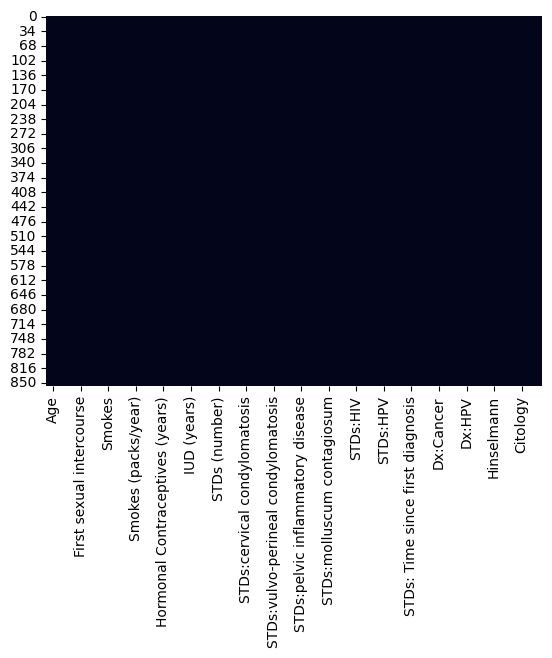

In [3]:
sns.heatmap(df.isnull(), cbar=False)

- A primera vista, parece que no existen valores nulos dentro del dataset, pero eso es porque se encuentran marcados utilizando el símbolo '?'
- Para contrarrestar esto y poder evaluar de mejor manera el estado del dataset, se hará un reemplazo con los datos inciertos por el valor NaN de la librería numpy.

In [4]:
df = df.replace('?', np.NaN)

<Axes: >

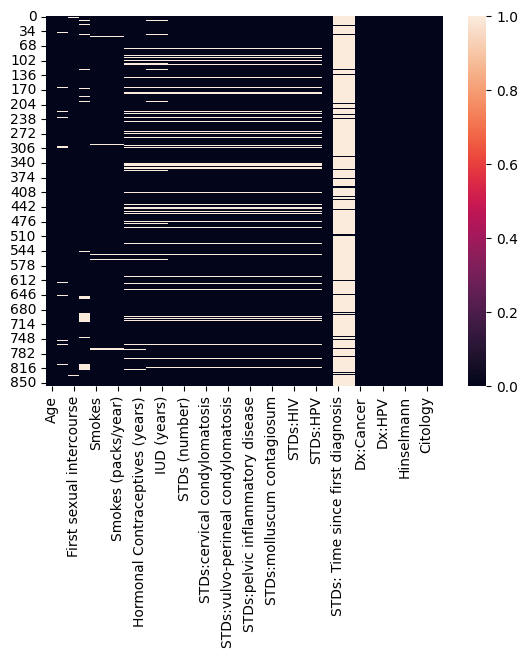

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


## Exploración de variables

In [7]:
categorical_columns = []

quantitative_columns = []

for column in df.columns:
    # print(column, df[column], pd.api.types.is_float_dtype(df[column]) )
    if pd.api.types.is_any_real_numeric_dtype(df[column]):
        quantitative_columns.append(column)
    else:
        categorical_columns.append(column)

print("Categorical Columns:", categorical_columns)
print("Quantitative Columns:", quantitative_columns)

Categorical Columns: ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
Quantitative Columns: ['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


In [8]:
print(df.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


- Si bien esta separación entre columnas categóricas funciona a nivel superficial, existen varias columnas incorrectamente clasificadas, por lo que la asignación se deberá hacer a mano a través de exploración manual.

### Exploración individual de variables

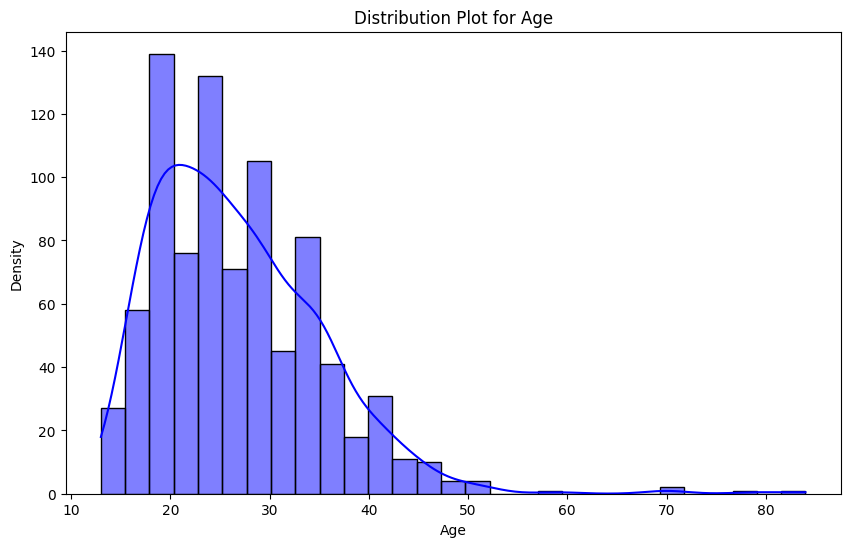

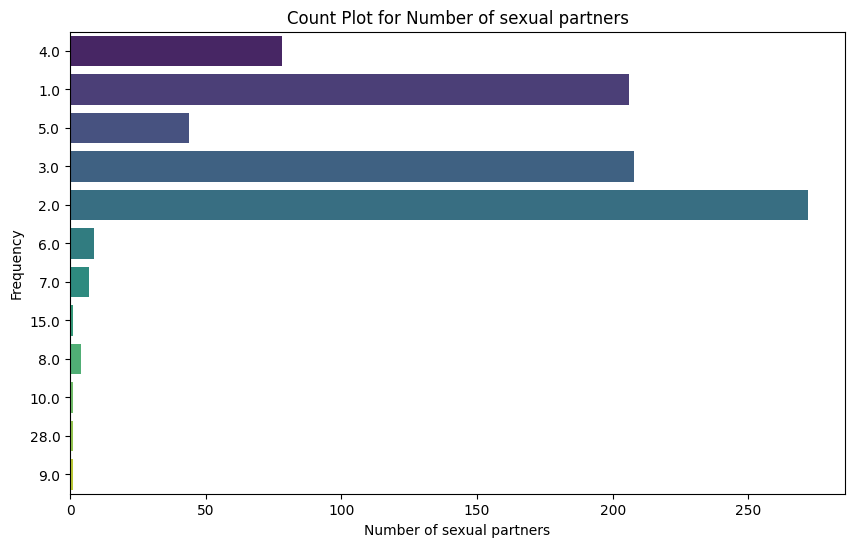

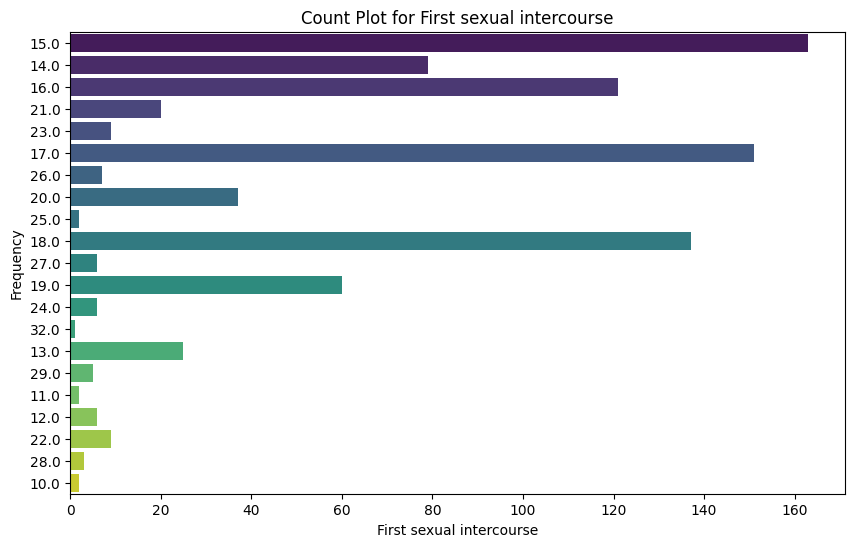

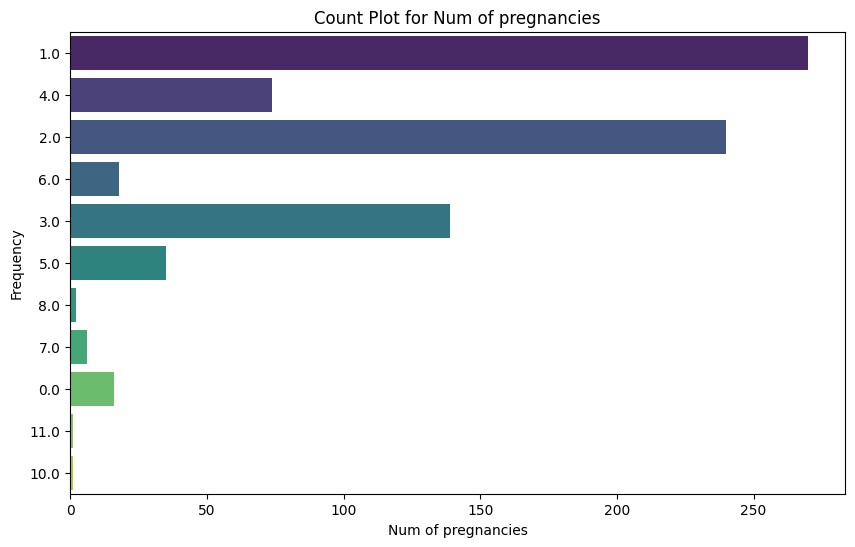

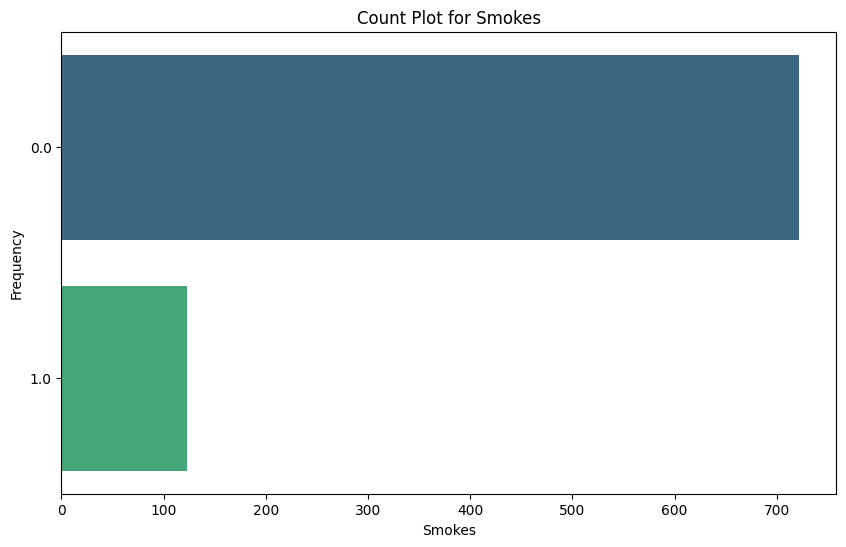

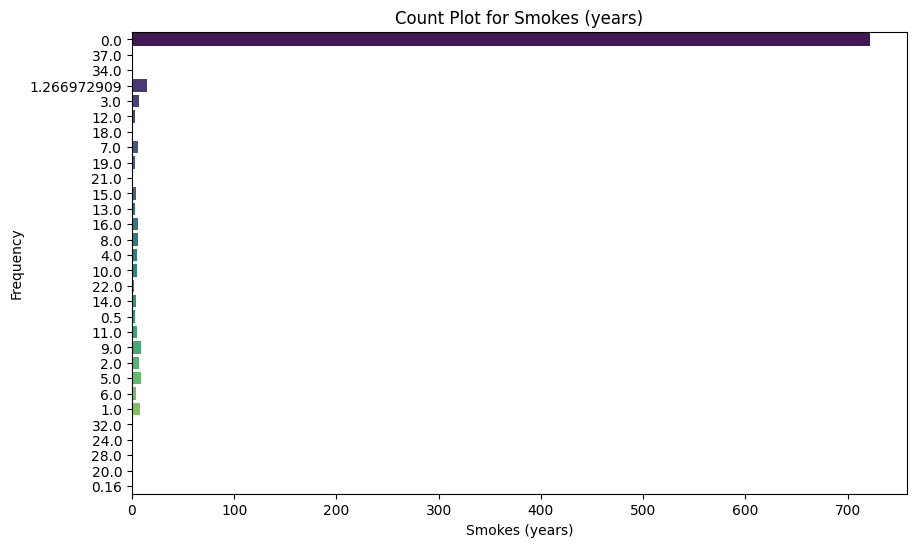

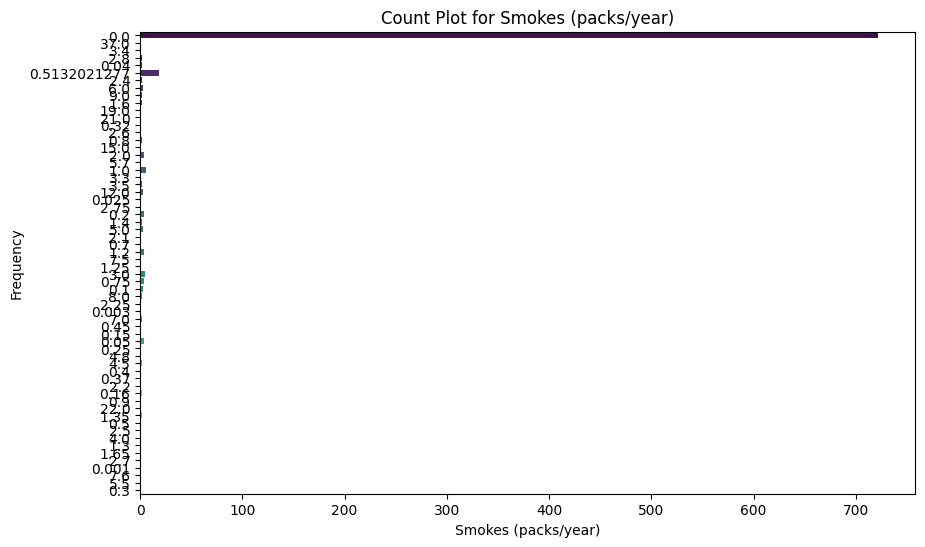

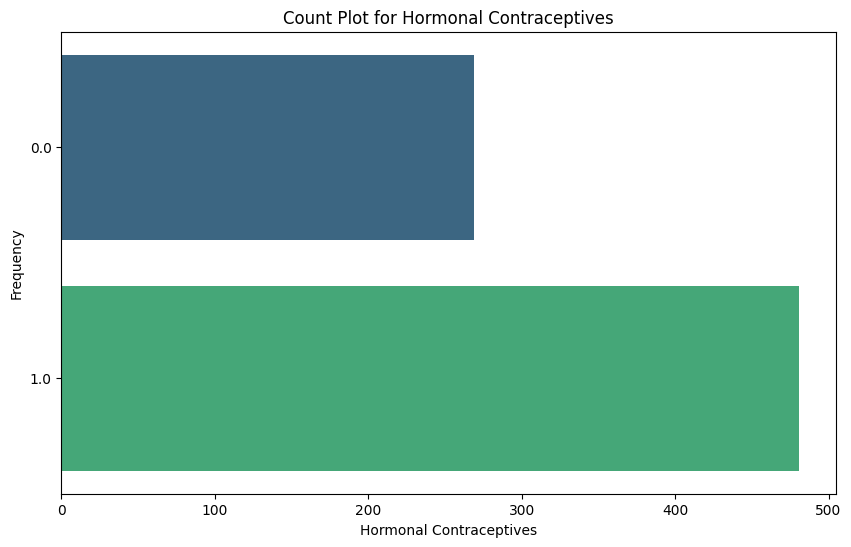

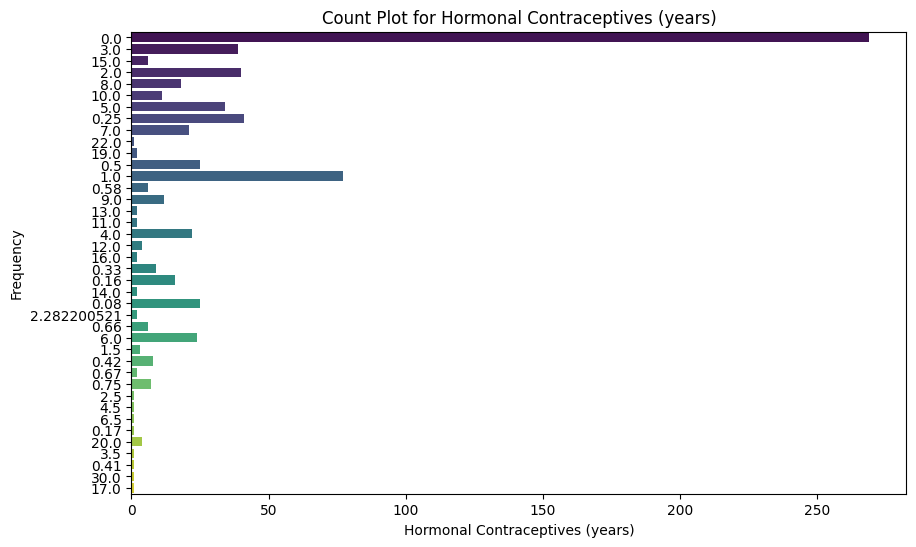

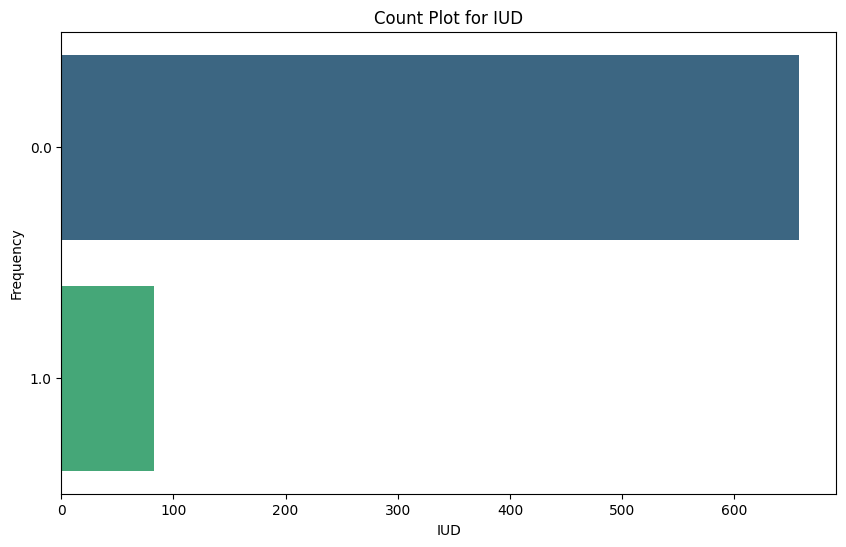

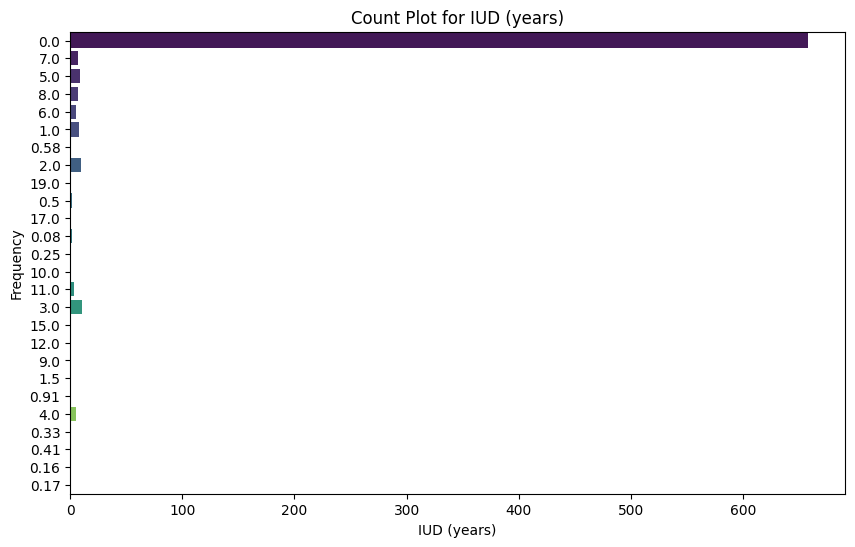

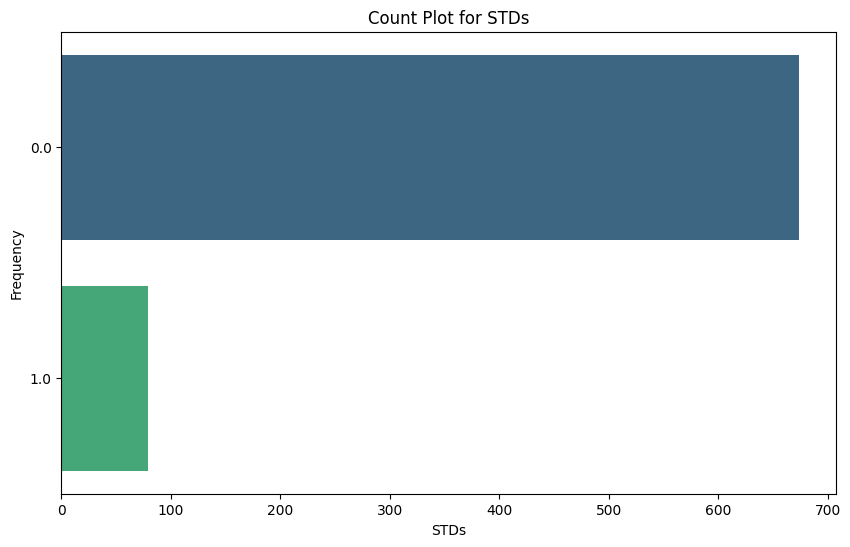

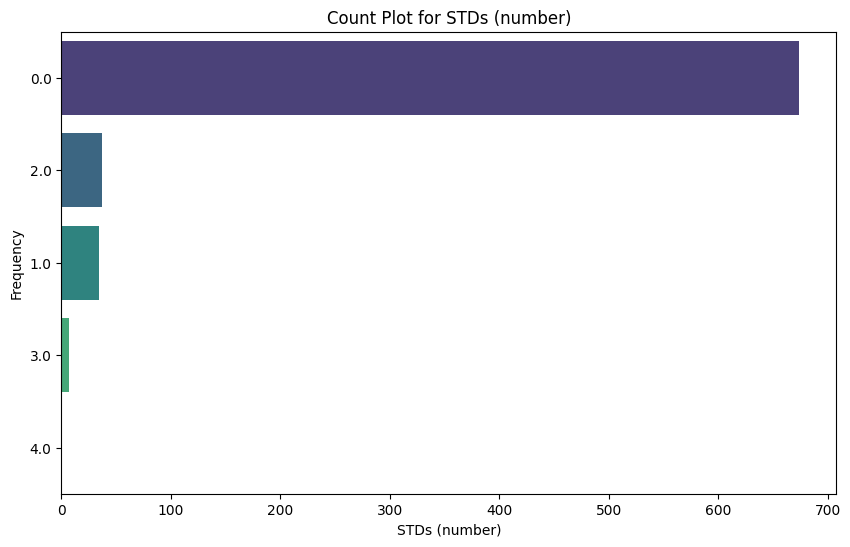

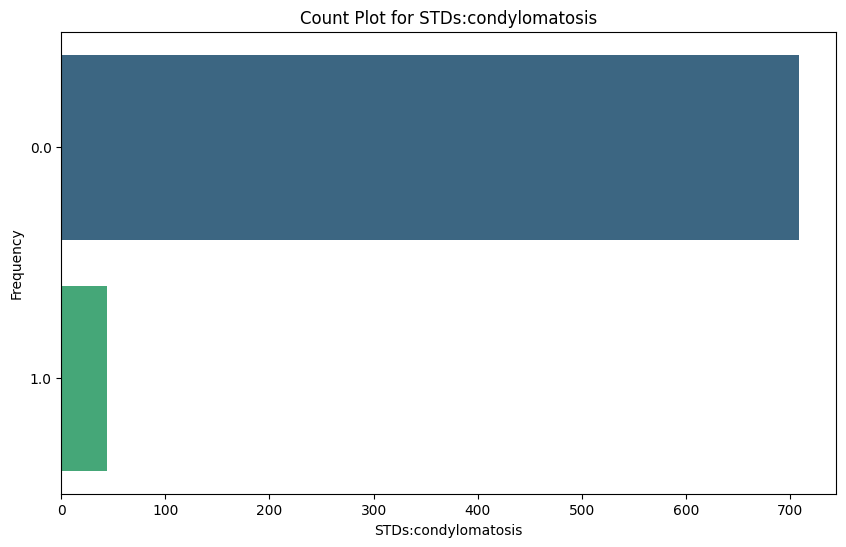

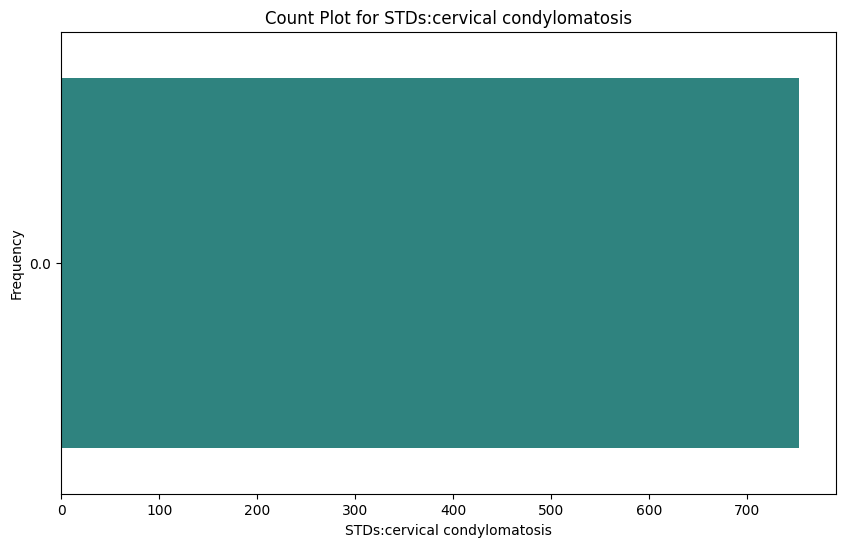

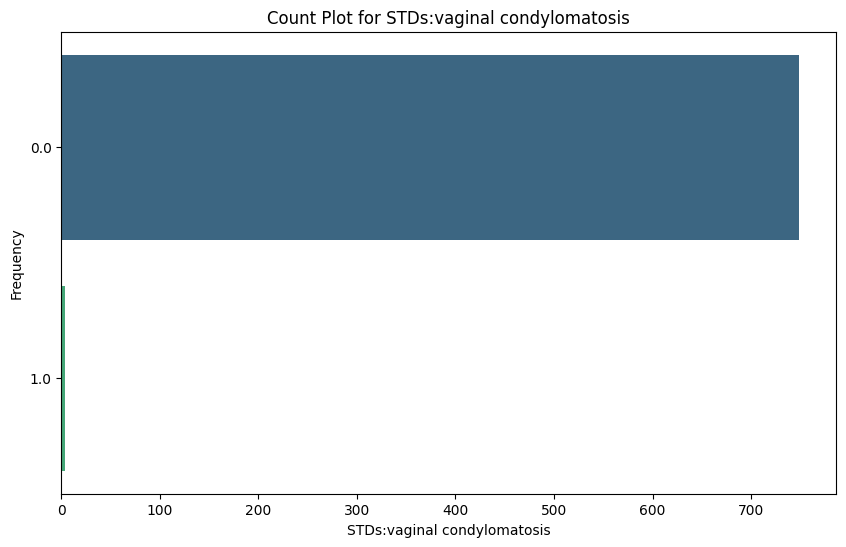

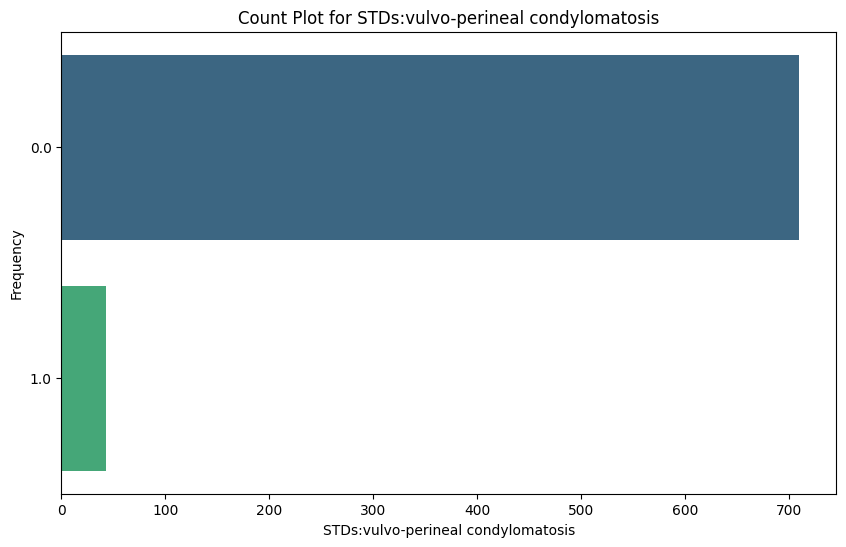

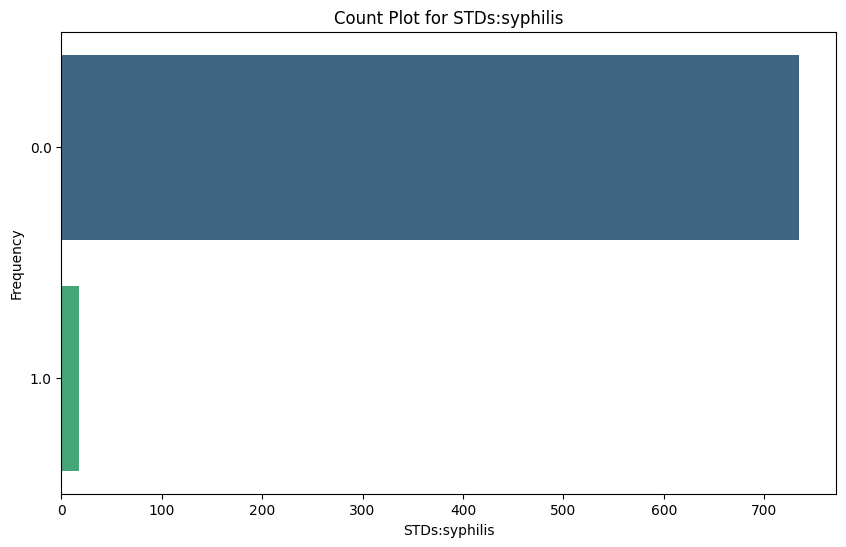

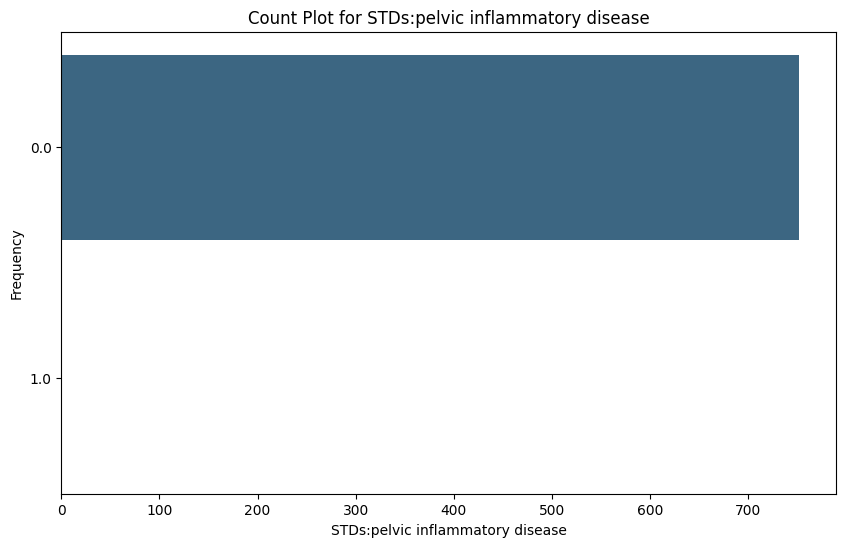

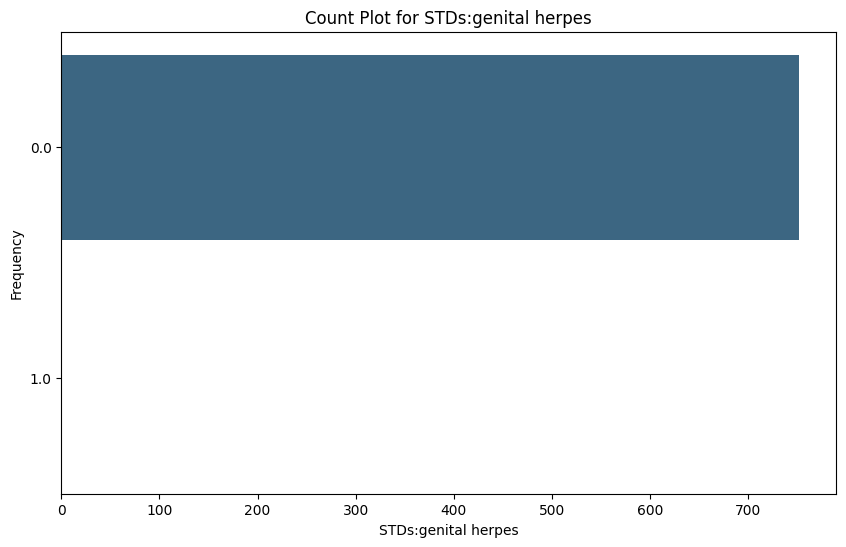

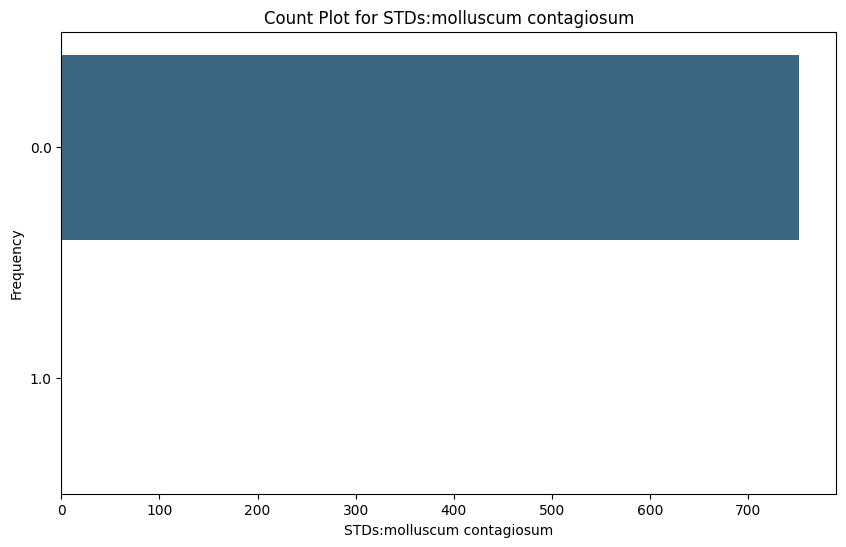

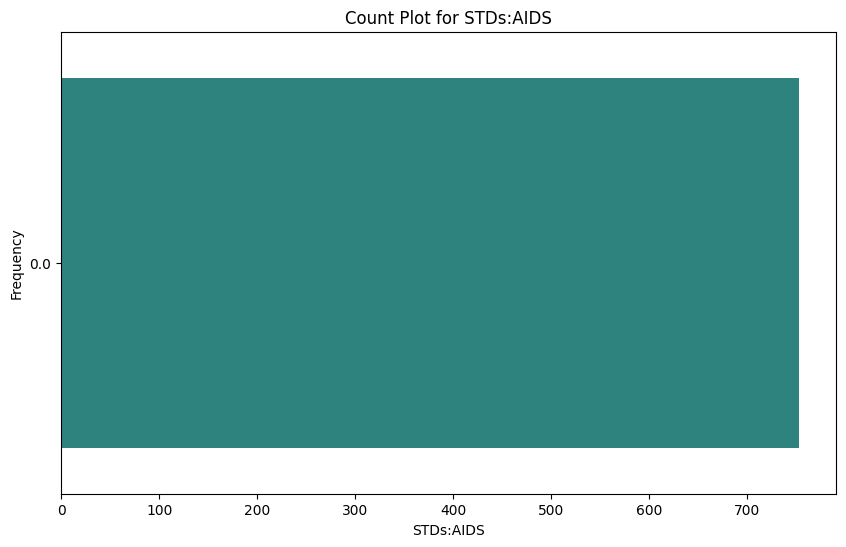

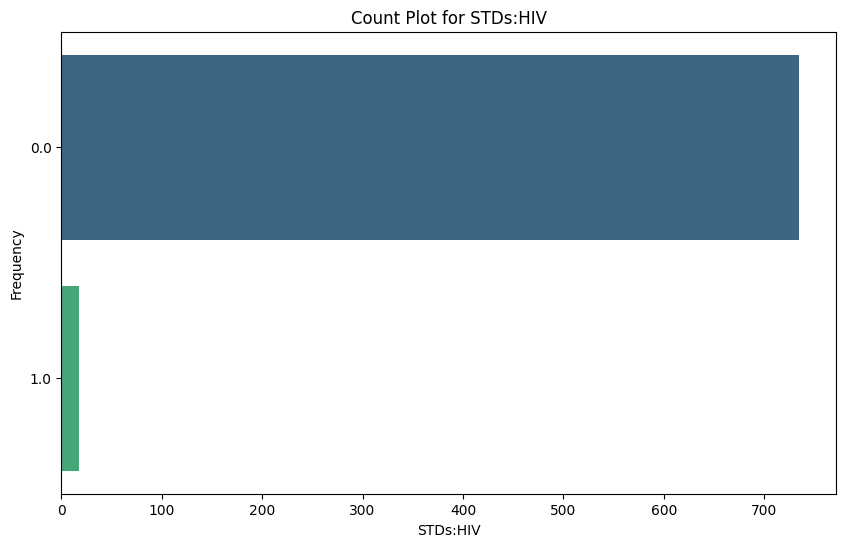

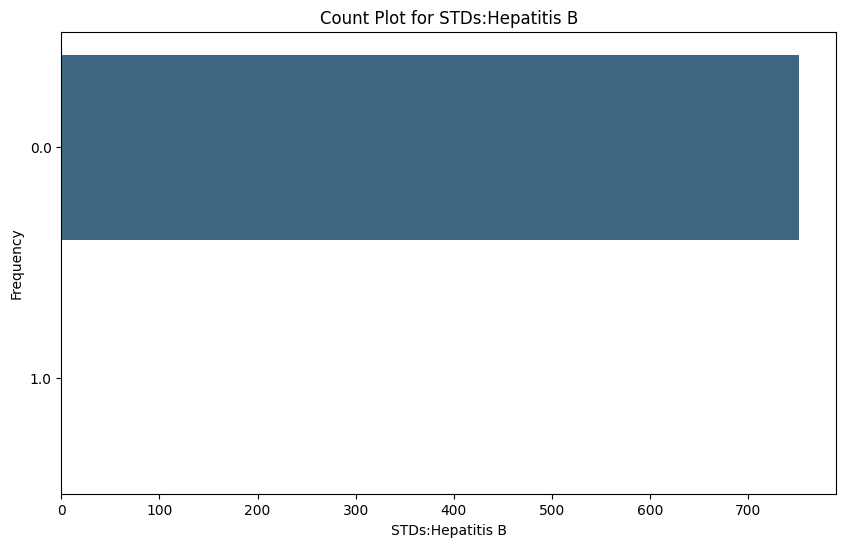

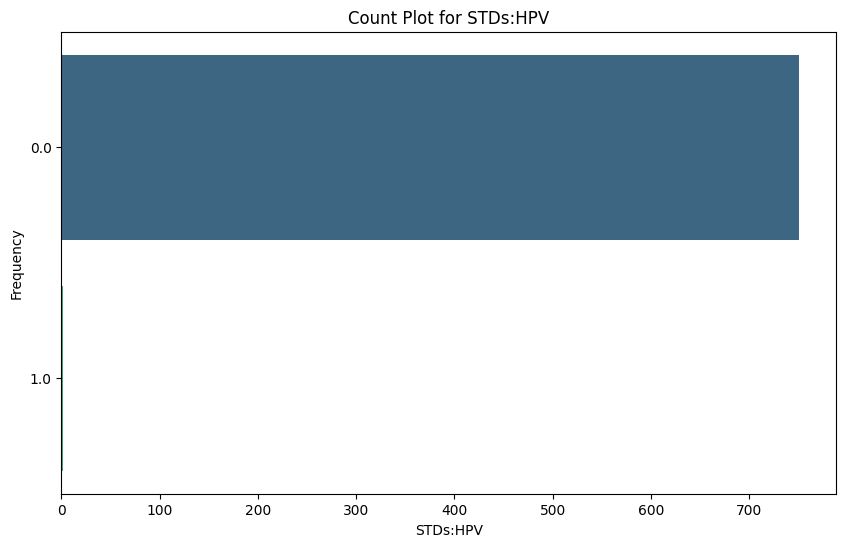

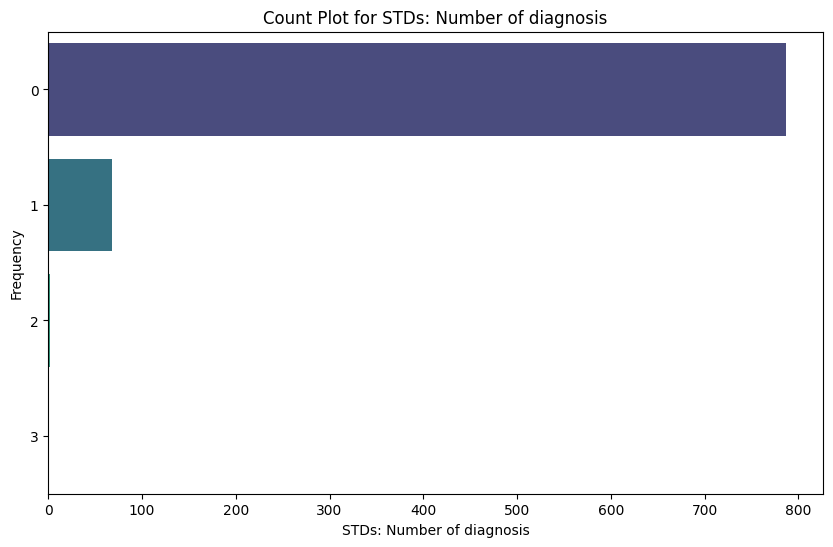

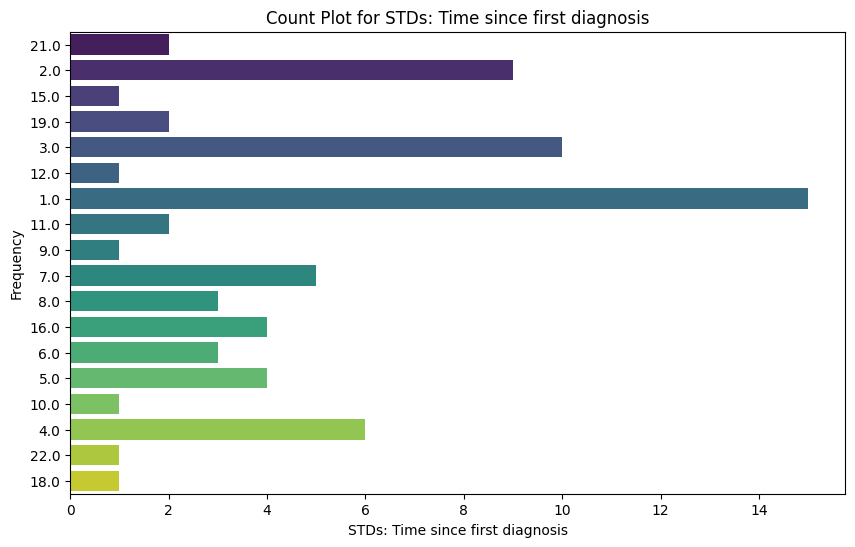

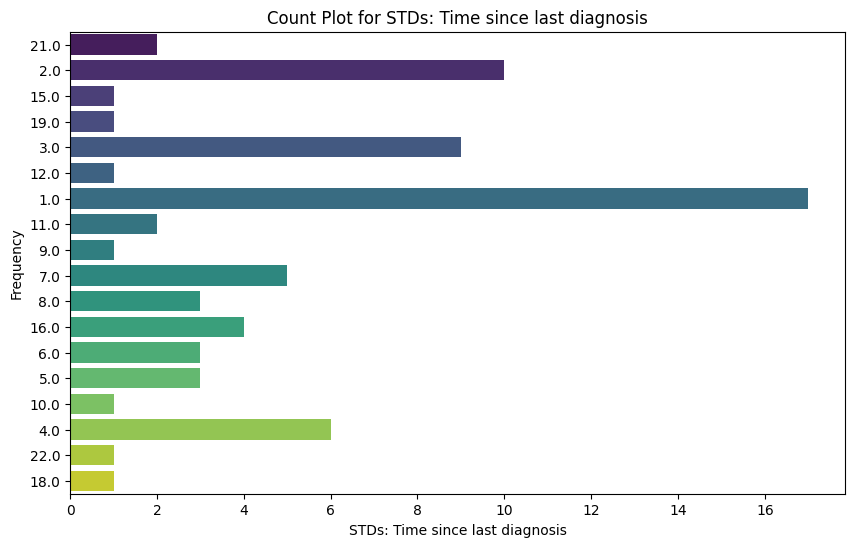

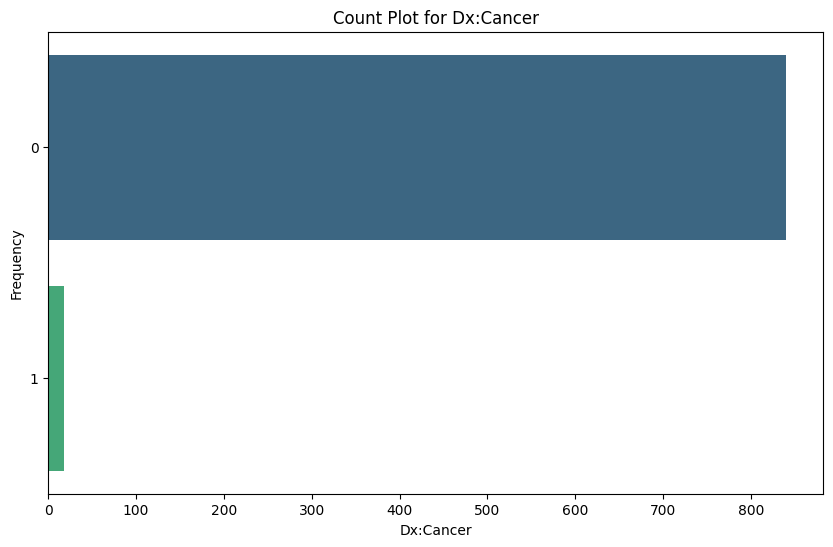

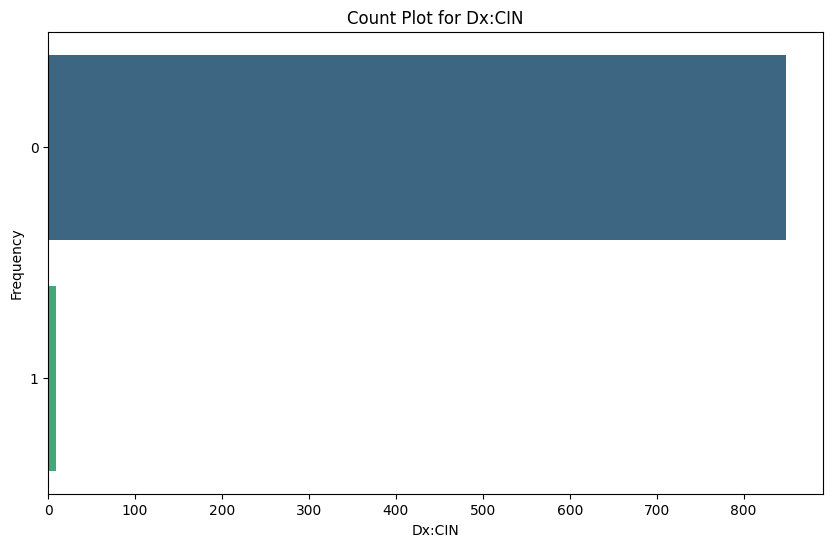

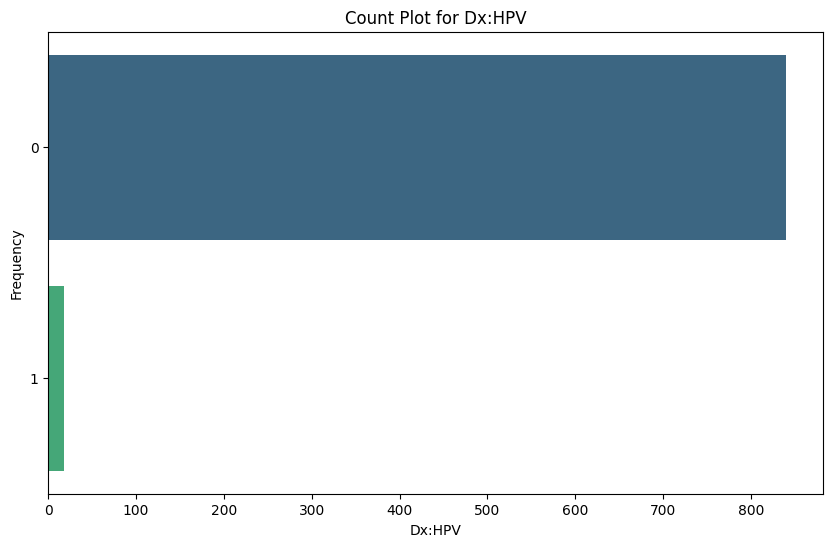

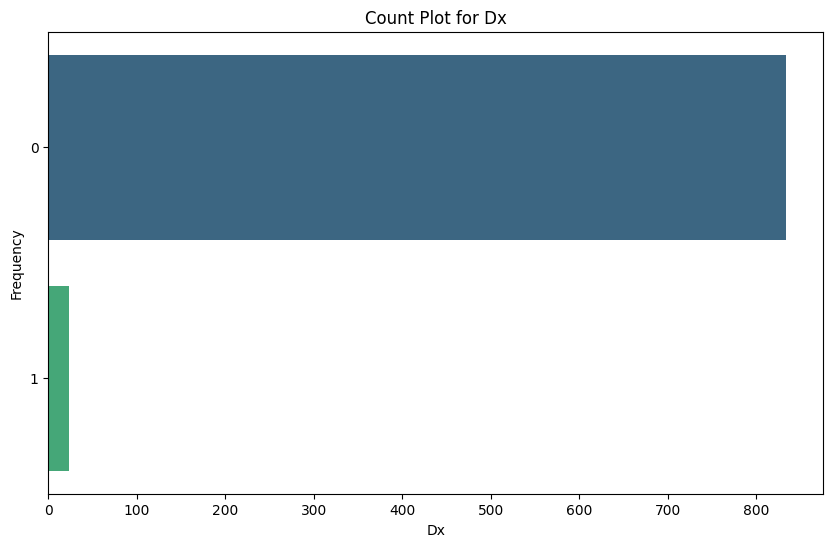

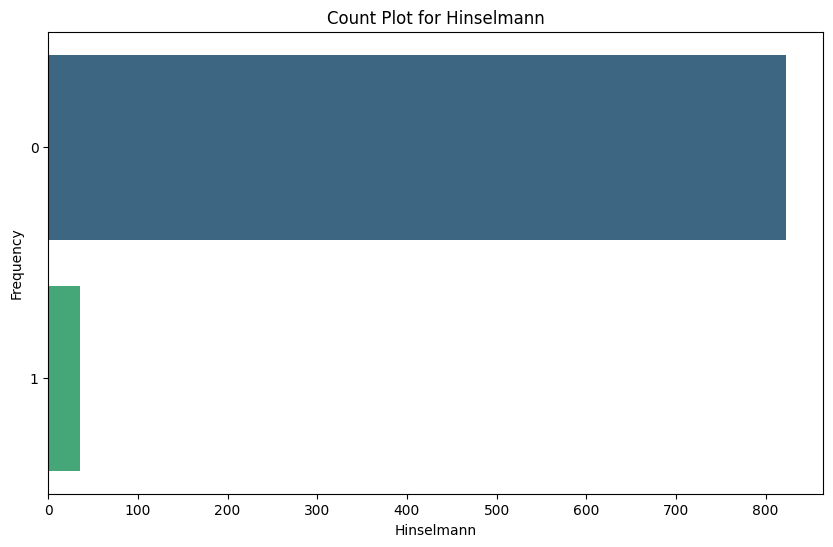

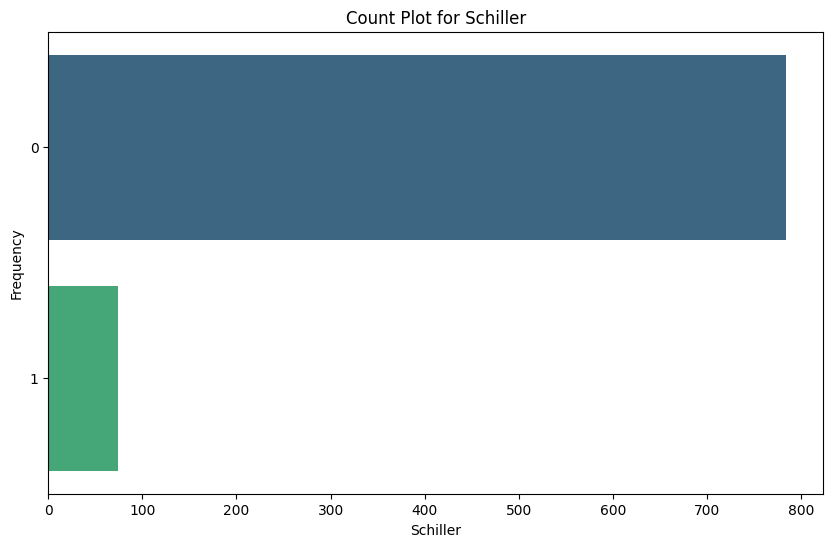

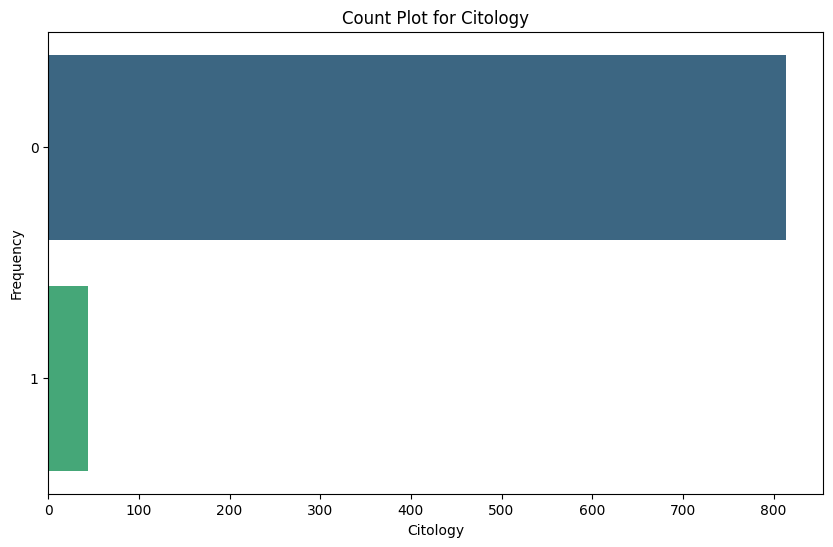

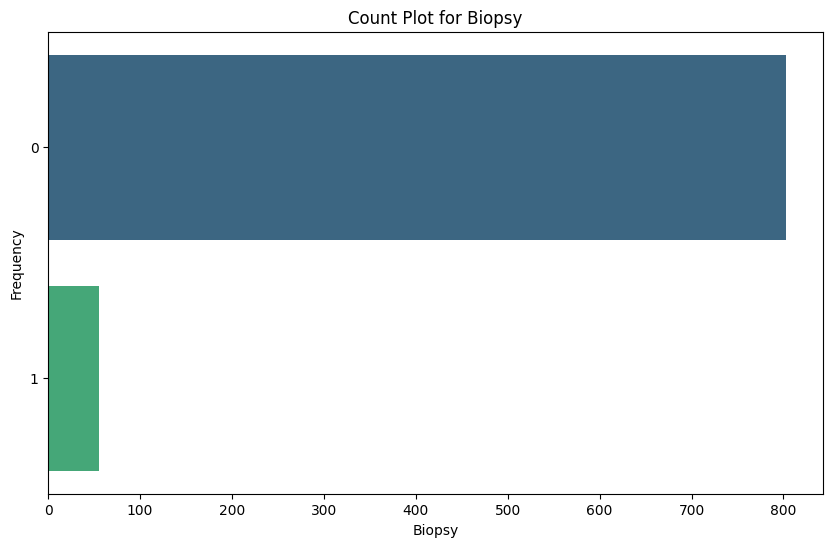

In [9]:
for column in df.columns:
    plt.figure(figsize=(10, 6))  # Set the figure size for better visualization

    # Summon the magic to plot the graph based on data type detection
    if df[column].dtype == 'object' or len(df[column].unique()) < 20:
        # Presume categorical if dtype is object or unique values are less than 20
        sns.countplot(y=column, data=df, palette='viridis')
        plt.title(f'Count Plot for {column}')
    else:
        # Presume quantitative if dtype is numerical and unique values are 20 or more
        sns.histplot(df[column], kde=True, color='blue')
        plt.title(f'Distribution Plot for {column}')
    
    plt.xlabel(column)
    plt.ylabel('Frequency' if df[column].dtype == 'object' or len(df[column].unique()) < 20 else 'Density')
    plt.show()

### Distribución de variables cuantitativas y cualitativas

In [10]:
categorical_columns = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy']
quantitative_columns = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','STDs (number)','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs: Time since first diagnosis','STDs: Time since last diagnosis']

- Después de una exploración del comportamiento y valores dentro de cada una de las columnas, se hace la división entre variables cuantitativas y cualitativas.

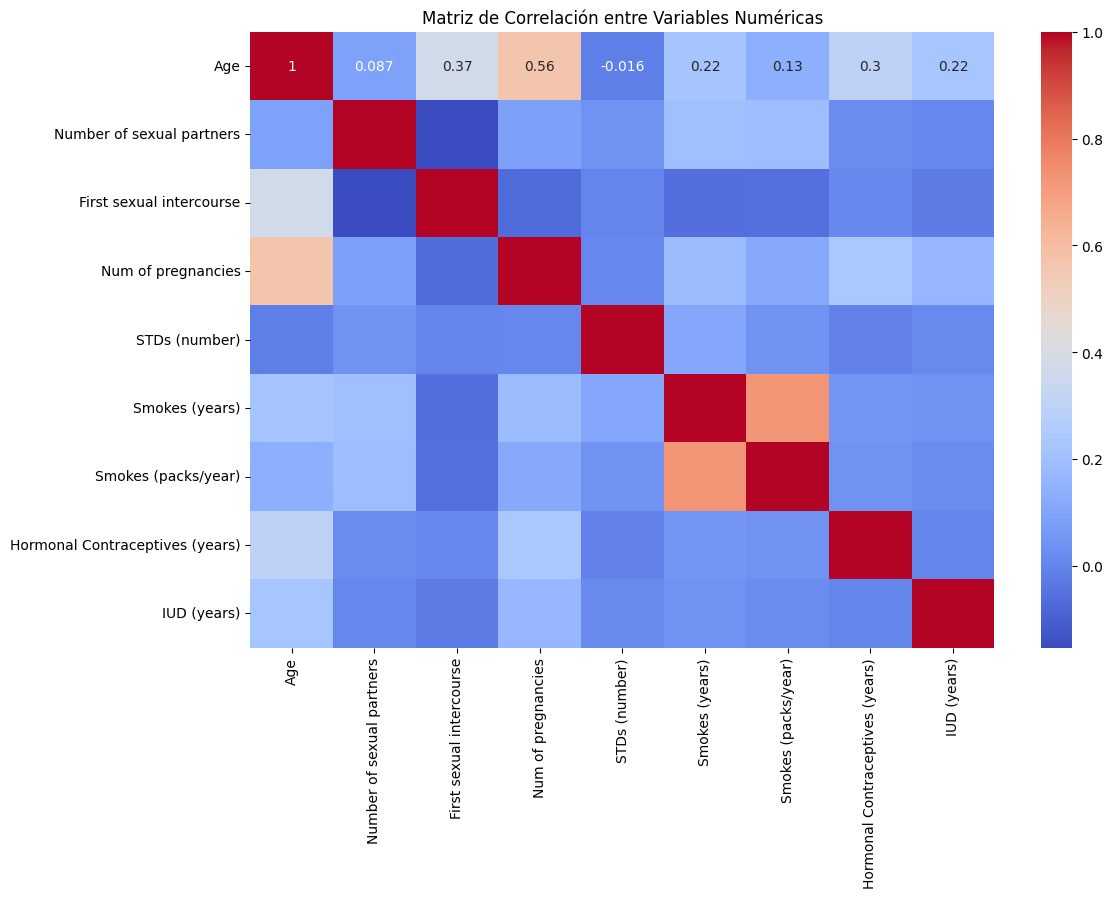

In [20]:
correlation_matrix = df[quantitative_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

### Eliminación de variables no relevantes
- Para saber qué variables no nos resultan relevantes, lo que haremos será eliminar aquellas que posean más de 25% de valores nulos; la intención es manejar los valores nulos, por lo que tener excesivos nulos es ruido probable. 

In [11]:
threshold = 0.25 # 25% de datos nulos 

columns_to_drop = []

for column in df.columns:
    null_percentage = df[column].isnull().sum() / len(df)
    
    if null_percentage > threshold:
        columns_to_drop.append(column)
        if column in categorical_columns:
            categorical_columns.remove(column)
        if column in quantitative_columns:
            quantitative_columns.remove(column)

print(columns_to_drop)

['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']


In [12]:
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


<Axes: >

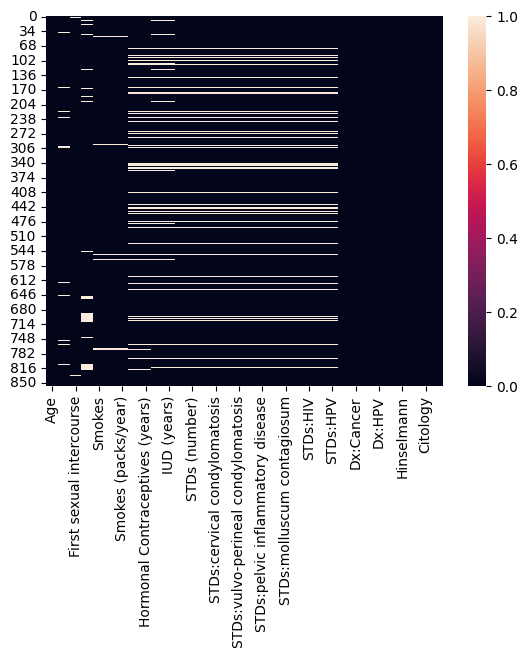

In [13]:
sns.heatmap(df.isnull())

- Una vez que la presencia de variables plagadas de nulos es manejada, se intenta manejar la presencia de nulos dentro de las variables restantes.
- En el caso de las variables cuantitativas, se redistribuyen los valores nulos para seguir la tendencia de valores dentro de esta; de esta manera, cualquier correlación con la variable sigue obedeciendo la tendencia de esta. 

### Manejo de valores nulos en las variables categóricas

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [16]:
imputer = IterativeImputer(random_state=0)
df[quantitative_columns] = imputer.fit_transform(df[quantitative_columns])
df.head()



,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15.0,1.0,14.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34.0,1.0,20.189283,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52.0,5.0,16.000000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46.0,3.0,21.000000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


<Axes: >

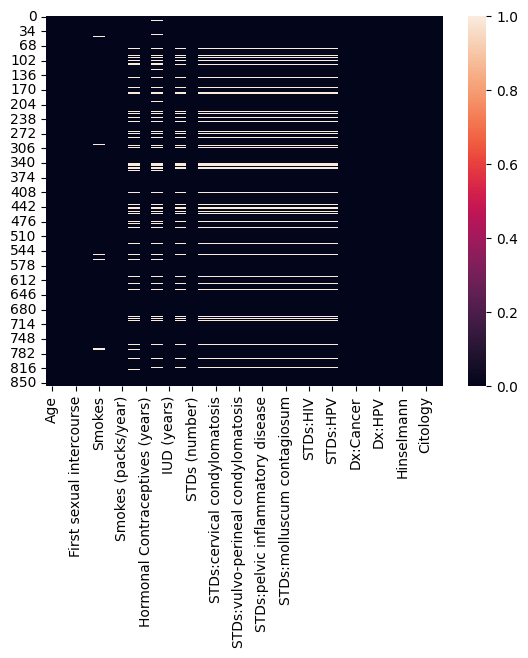

In [19]:
sns.heatmap(df.isnull())

#### Comportamiento de las variables cuantitativas

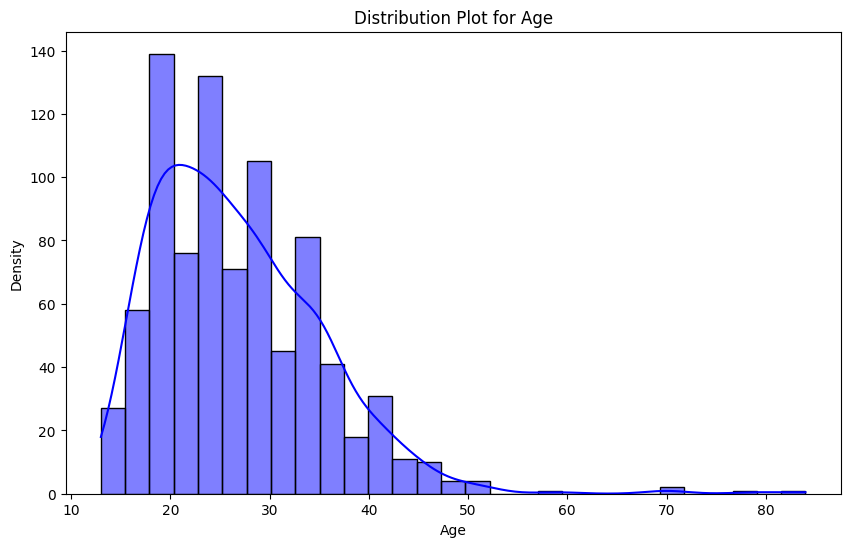

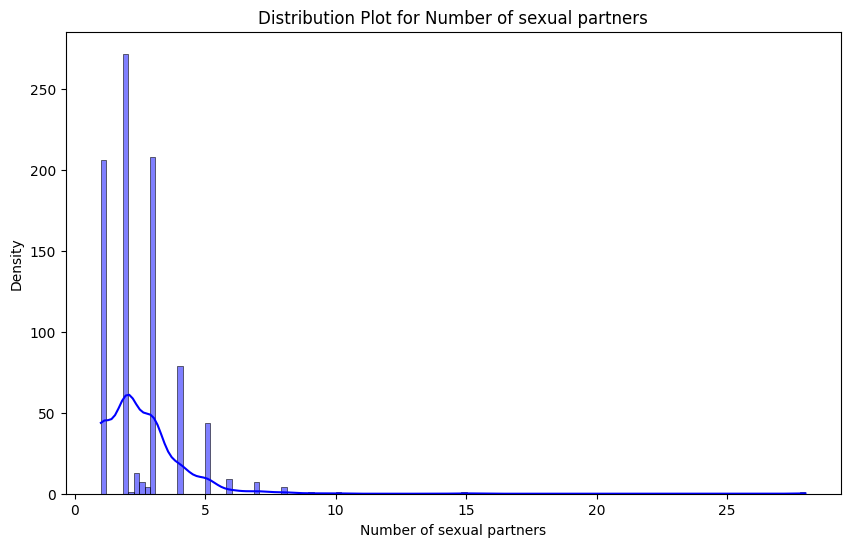

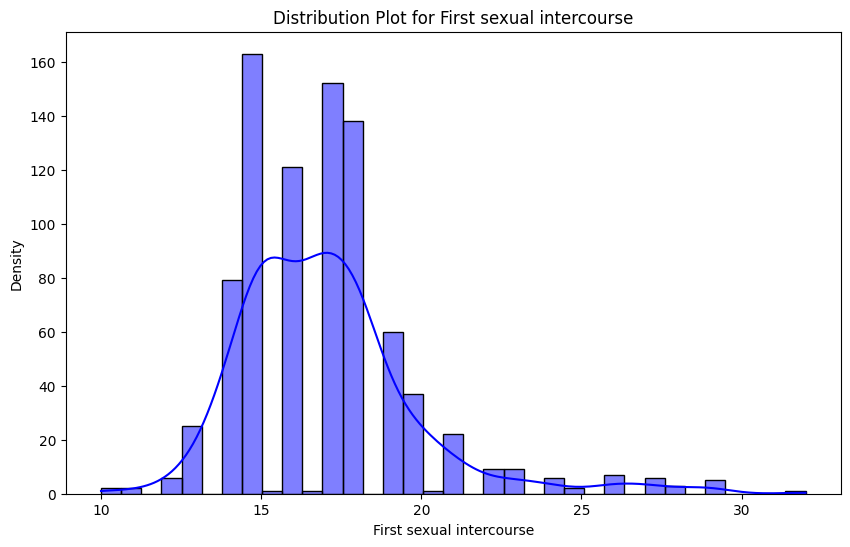

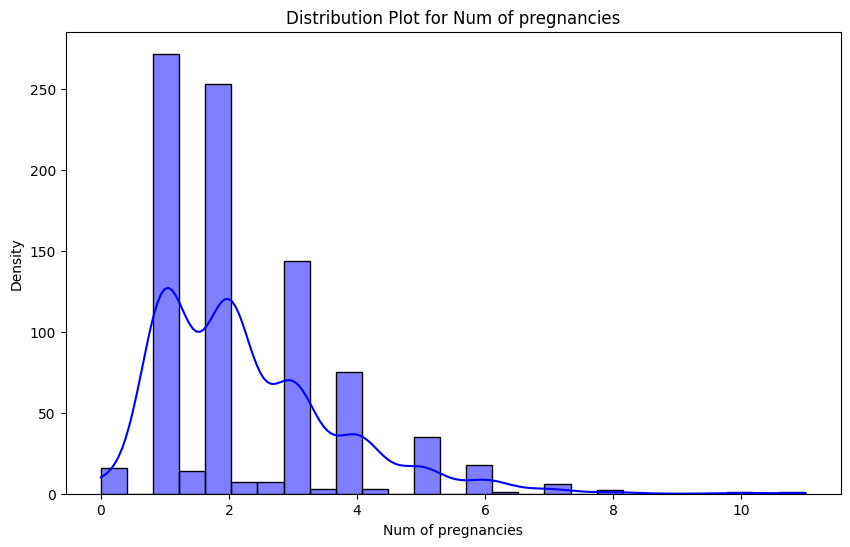

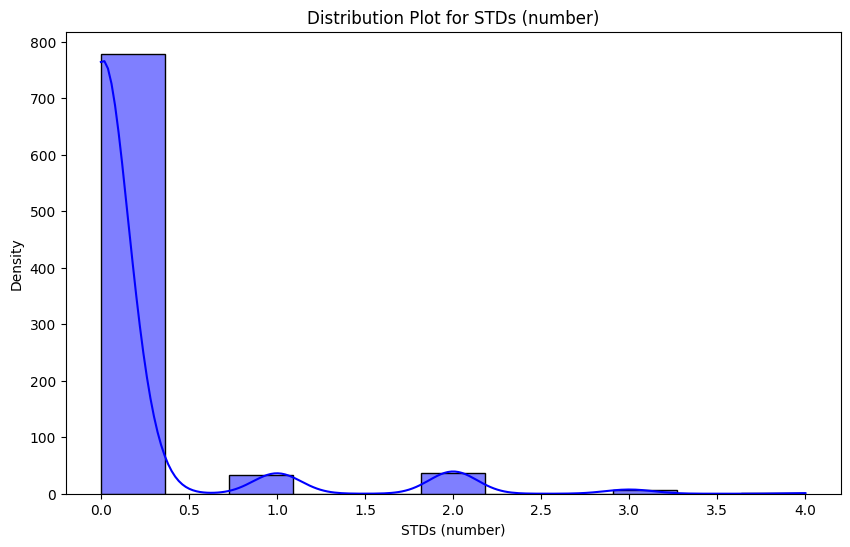

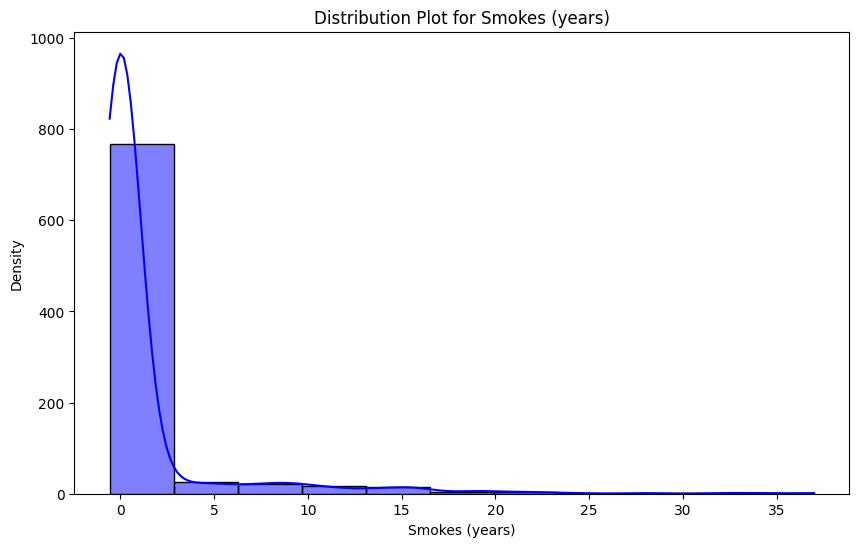

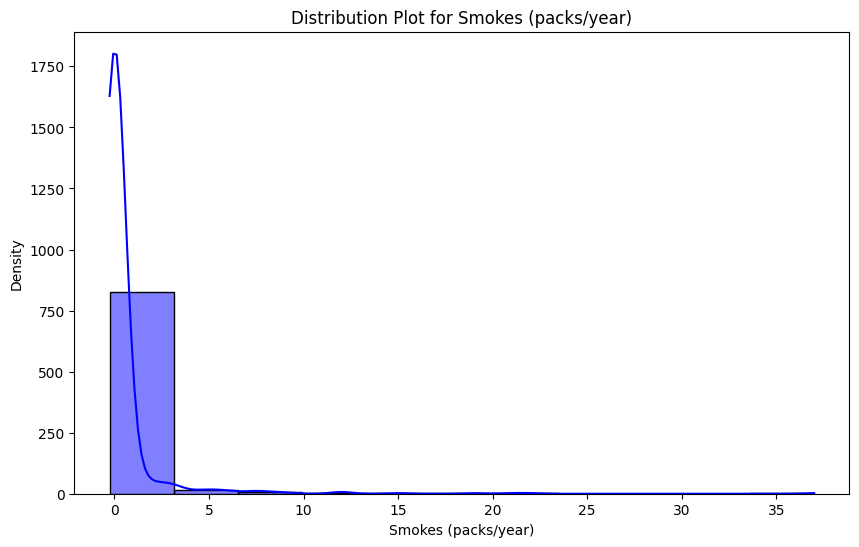

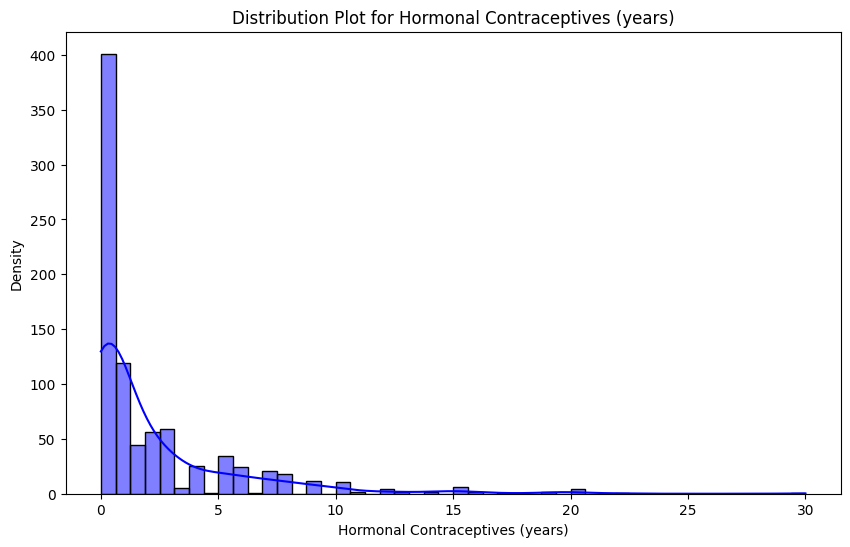

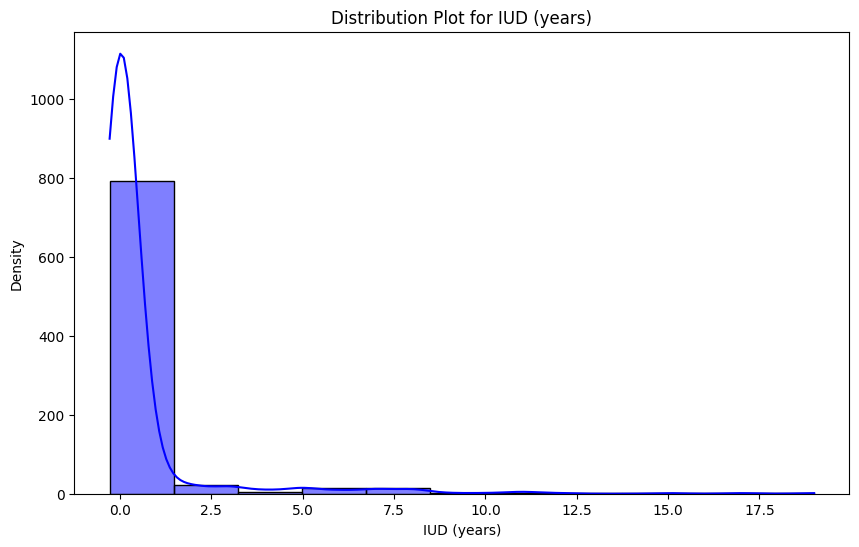

In [17]:
for column in quantitative_columns:
    plt.figure(figsize=(10, 6))  # Set the figure size for better visualization
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Distribution Plot for {column}')
    
    plt.xlabel(column)
    plt.ylabel('Frequency' if df[column].dtype == 'object' or len(df[column].unique()) < 20 else 'Density')
    plt.show()

### Manejo de variables categóricas y sus valores nulos

In [ ]:
df[quantitative_columns] = imputer.fit_transform(df[quantitative_columns])
